# **EDA + DATACLEANING + PREPROCESSING**
---

**Objetivo**

Se va a analizar el dataset de un seguro médico, que contiene características de una persona y el precio que se le aplica

Vamos a realizar lo siguiente:

- EDA: Explorar los datos
- Data Cleaning: Limpiar los datos en blanco, así como detectar outliers y errores lógicos de información
- Pre-processing

En primer lugar, importamos las líbrerías utilizadas en ETL (Eda, Extract, Load): 

1. **Numpy**: soporte para vectores y matrices (numpy Arrays), sobre el que se apoya pandas.
2. **Pandas**: soporte para Series y DataFrames y funciones de análisis de datos.
3. **Matplotlib**: librería de gráficos sobre la que se apoya Seaborn y las funciones de visualización de pandas.
4. **Seaborn**: librería de *easy ploting*.

Aprovecharemos también para gestionar la visualización en linea (*%matplotlib inline*), los estilos gráficos (*plot style: ggplot*) y la visualización de pandas (*max_rows* y *format*).

También cargaremos algunas de las funciones de preprocesamiento de scikit-learn, contenidas en el **scikit preprocessing**.

**Importación de librerías**

In [1]:
# Sistema operativo
import os

# Pandas y Numpy
import numpy as np
import pandas as pd

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import pyplot as plt
%matplotlib inline

# Versiones de las librerías instaladas
print("Working with these versions of libraries\n")
print(f"Numpy version {np.__version__}")
print(f"Pandas version {pd.__version__}")

# transformers
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Config
plt.style.use('ggplot')
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:,.2f}'.format

Working with these versions of libraries

Numpy version 1.21.5
Pandas version 1.4.4


**Ruta del dataset**

In [2]:
# Si se usa Collab
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
CWD = os.getcwd() # Ruta actual
DATA_PATH = os.path.join(CWD, "data") # Ruta de la carpeta Data

print(CWD)
print(DATA_PATH)

d:\Data_Science\EDA_CLEANING_PREPROCCESING\Eda-DataCleaning-Preprocessing-SEGUROMEDICO
d:\Data_Science\EDA_CLEANING_PREPROCCESING\Eda-DataCleaning-Preprocessing-SEGUROMEDICO\data


**Clases y funciones**

In [4]:
# Elimina duplicados
def drop_duplicates (df):
    '''
    Elimina filas duplicadas del dataset
    '''
    print(f"{df.shape}")
    df_duplicated = df[df.duplicated(keep = False)]
    print(f"Se han eliminado {len(df[df.duplicated()])} registros repetidos")
    df.drop_duplicates(inplace = True)
    print(f"{df.shape}")

    return df_duplicated

In [5]:
# Nulos en variables
def nulos_variable (dataframe):
    ''' 
    Muestra los nulos que hay
    '''
    nulos_numericas = dataframe.select_dtypes(include = np.number).isnull().sum()[dataframe.select_dtypes(include = np.number).isnull().sum() > 0]
    nulos_categoricas =dataframe.select_dtypes(exclude = np.number).isnull().sum()[dataframe.select_dtypes(exclude = np.number).isnull().sum() > 0]

    print ('Las variables numéricas que tienen nulos son:\n', nulos_numericas, '\n\nHay un total de', len(nulos_numericas), 'variables numéricas con nulos')
    print ('\n\nLas variables categóricas que tienen nulos son:\n', nulos_categoricas, '\n\nHay un total de', len(nulos_categoricas), 'variables categóricas con nulos')
    print ('\n\nVARIABLES TOTALES CON NULOS:', len(nulos_numericas)+len(nulos_categoricas))

In [6]:
# Eliminación de variables con baja varianza
def varianza_nula (dataframe):
    ''' 
    Elimina variables con baja varianza    
    '''

    df_microsoft_numerical_describe = dataframe.describe(include=np.number).T
    lista_numerica_baja_varianza = df_microsoft_numerical_describe[(df_microsoft_numerical_describe['std']<0.15)].index.tolist() # Indico la varianza
    dataframe.drop(lista_numerica_baja_varianza, axis=1, inplace=True)
    print('Se han borrado las siguientes variables numéricas por tener baja varianza:\n',lista_numerica_baja_varianza )

    return dataframe

In [7]:
# Separación de variables
target = ['PRECIO'] # indico quién es la variable a predecir

def obtener_lista_variables(dataset):
  ''' 
  Obtengo listas de variables
  '''

  lista_numerica=[]
  lista_boolean=[] # numerica y con 2 valores
  lista_categorica=[] # object sin datatime

  for i in dataset: # si no especifico, aplica a las columnas (es como poner for i in dataset.columns:)
    if (dataset[i].dtype.kind == 'i'or dataset[i].dtype.kind == 'f' or dataset[i].dtype.kind == 'b') and len(dataset[i].unique())!=2\
     and i not in target:
      lista_numerica.append(i)
    elif (dataset[i].dtype.kind == 'i'or dataset[i].dtype.kind == 'f' or dataset[i].dtype.kind == 'b') and len(dataset[i].unique()) ==2\
     and i not in target:
      lista_boolean.append(i)
    elif (dataset[i].dtype.kind == 'O') and i not in target: # pongo elif y no else para que no me entre el datetime como categorica
      lista_categorica.append(i)


  return lista_numerica, lista_boolean, lista_categorica

In [8]:
# Visualización del target
def plot_target(dataframe, target):
    ''' 
    Visualización del target
    '''
    
    plt.figure(figsize=(10,4))
    plt.title(f'Analisis del {target}')  

    ax1 = plt.subplot (1,2,1)
    ax1 = sns.boxplot(x = dataframe[target])
    ax2 = plt.subplot (1,2,2)
    ax2 = plt.hist(x = dataframe[target]) 

In [9]:
# Análisis de las variables numéricas VS target
def analisis_numericas (dataframe, column, target):
    '''
    Pivot-table que me da las medidas de las variables numericas y su correlación con el target
    '''
    
    print(f"\nANÁLISIS DE {column} CON RESPECTO AL {target}\n")
    
    return dataframe.pivot_table(index=column, values=target, aggfunc=[len, min, np.mean, max]).sort_values(by=(column),ascending=True)

In [10]:
# Visualización de las variables numéricas VS target
def plot_numericas(dataframe,column,target):
    '''
    Visualización de las variables numéricas y su correlación con el target
    '''  
      
    plt.figure(figsize=[10,4])
    plt.title(f'Analisis de {column} VS {target}')
    if column=='HIJOS':
        sns.boxplot(x = column, y = target, data = dataframe, palette="coolwarm")
    
    else:
        sns.scatterplot(x = column, y = target, data = dataframe )
  
    return plt.show()

In [11]:
# Análisis de las variables categóricas VS target
def analisis_categoricas (dataframe,column,target):
    '''
    Pivot-table que me da las medidas de las variables categóricas y su correlación con el target
    '''

    print(f"\nANÁLISIS DE {column} CON RESPECTO AL {target}\n")
    
    return dataframe.pivot_table(index=column, values=target, aggfunc=[len,sum,np.mean]).sort_values(by=('len', target),ascending=False)

In [12]:
# Visualización de las variables categóricas VS target
def plot_categoricas(dataframe,column,target):
    '''
    Visualización de las variables categóricas y su correlación con el target
    '''    
    
    plt.figure(figsize=[10,4])
    plt.title(f'Analisis de {column} VS {target}')
    
    ax1 = plt.subplot (1,2,1)
    ax1 = sns.boxplot(x=column, y=target, data= dataframe, palette="coolwarm")
    ax2 = plt.subplot (1,2,2)
    ax2 = sns.violinplot(x=column, y=target, data= dataframe, palette="coolwarm")  

    return plt.show()

In [13]:
# Análisis de las variables booleanas VS target
def analisis_booleanas (dataframe,column,target):
    '''
    Pivot-table que me da las medidas de las variables booleanas y su correlación con el target
    '''
    
    print(f"\nANÁLISIS DE {column} CON RESPECTO AL {target}\n")
    
    return dataframe.pivot_table(index=column, values=target, aggfunc=[len,sum,np.mean]).sort_values(by=('len', target),ascending=False)

In [14]:
# Visualización de las variables booleanas VS target
def plot_booleanas(dataframe,column,target):
    '''
    Visualización de las variables booleanas y su correlación con el target
    '''    
    
    plt.figure(figsize=[10,4])
    plt.title(f'Analisis de {column} VS {target}')
    
    ax1 = plt.subplot (1,2,1)
    ax1 = sns.boxplot(x=column, y=target, data= dataframe, palette="coolwarm")
    ax2 = plt.subplot (1,2,2)
    ax2 = sns.violinplot(x=column, y=target, data= dataframe, palette="coolwarm")  

    return plt.show()

**DataFrameReporter**
Nos va a permitir hacer un primer contacto con el dataset.\
Se trata de una clase auxiliar que hará una parte del **EDA**.

In [15]:
class DataFrameReporter(object):
    '''
    Helper class that reports nulls and datatypes of columns
    '''
    def __init__(self, df): # Variables que le tengo que suministrar a la clase
        '''
        Constructor for the class.
        Needs dataframe
        '''
        self.df = df
               
    def analyze_X(self, X):
        '''
        Analyses the DataFrame you pass and returns a report of nulls, distribution and other goodies.
        '''        
               
        dtypes = X.dtypes.to_frame().rename(columns = {0:"Dtypes"}) # Tipos de variables

        nulls_in_X = X.isnull().sum().to_frame().rename(columns = {0:"Absolute_nulls"}) # Número de nulos en las variables
        nulls_in_X["Relative_nulls"] = nulls_in_X["Absolute_nulls"]/X.shape[0]
        nulls_in_X["Relative_nulls"] = nulls_in_X["Relative_nulls"].apply(
            lambda number: round(number, 3) * 100 # Relative_nulls = (Absolute_nulls/Shape)*100 ... con 3 cifras significativas
        )
        
        nulls_in_X = pd.concat([nulls_in_X, dtypes], axis = 1)
        nulls_in_X["Shape"] = X.shape[0] # Número de registros
        nulls_in_X = nulls_in_X[["Dtypes", "Shape", "Absolute_nulls", "Relative_nulls"]] # Ordeno las columnas

         
        describe_values_num = X.describe().T # Describe de las variables numéricas
        report_df = pd.concat([nulls_in_X, describe_values_num], axis = 1)
               
        describe_values_cat = X.describe(exclude = "number").T # Describe de las variables categóricas
        report_df = pd.concat([report_df, describe_values_cat], axis = 1)

        report_df.fillna("", inplace = True) # Imputo los nulos con un vacío
        report_df.sort_values("Dtypes", ascending = True, inplace = True) # Ordeno las variables por tipos
        
        return report_df
        
    def get_reports(self):
        '''
        Calls analyze_X method and returns report DataFrame for train and test.
        '''
        report_df = self.analyze_X(X = self.df)
                
        return report_df

## **1.- Data Loading**

Descargamos el dataset desde el siguiente link y lo metemos dentro de la carpeta 'data':

https://drive.google.com/file/d/1SeXmGKPSLcg2v0boefKwK8l7Jtl09FjZ/view?usp=drive_link

In [16]:
# Cargar un CSV en df
seguros = pd.read_csv (os.path.join(DATA_PATH, "dataset_seguros_con_nulos.csv"), sep=";")
seguros.head()

,EDAD,SEXO,IMC,PESO,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO
0,37,MASCULINO,29.83,80.00,2.00,1,NO,BARCELONA,534
1,25,MASCULINO,26.22,71.00,0.00,0,NO,BARCELONA,227
2,52,FEMENINO,30.78,83.00,1.00,1,NO,BARCELONA,900
3,23,MASCULINO,23.84,64.00,0.00,0,NO,BARCELONA,200
4,60,FEMENINO,36.01,97.00,0.00,0,NO,BARCELONA,1102


**Eliminar filas repetidas**

In [17]:
drop_duplicates (df = seguros)

(1338, 9)
Se han eliminado 1 registros repetidos
(1337, 9)


,EDAD,SEXO,IMC,PESO,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO
378,19,MASCULINO,30.59,82.00,0.00,0,NO,SEVILLA,137
459,19,MASCULINO,30.59,82.00,0.00,0,NO,SEVILLA,137


In [18]:
seguros.reset_index (inplace = True)
del seguros['index']

## **2.- EDA** --> *DATA UNDERTANDING*

### 2.1.- ANÁLISIS UNIVARIANTE DE LOS DATOS

**A.- Data Size**

In [19]:
#Tamaño del dataset
seguros.size

12033

In [20]:
# Filas y columnas
seguros.shape

(1337, 9)

In [21]:
# Información resumida del dataset
seguros.info (verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Columns: 9 entries, EDAD to PRECIO
dtypes: float64(3), int64(3), object(3)
memory usage: 94.1+ KB


**B.- Visualización directa de los datos**

In [22]:
# Cinco primeros registros
seguros.head()

,EDAD,SEXO,IMC,PESO,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO
0,37,MASCULINO,29.83,80.00,2.00,1,NO,BARCELONA,534
1,25,MASCULINO,26.22,71.00,0.00,0,NO,BARCELONA,227
2,52,FEMENINO,30.78,83.00,1.00,1,NO,BARCELONA,900
3,23,MASCULINO,23.84,64.00,0.00,0,NO,BARCELONA,200
4,60,FEMENINO,36.01,97.00,0.00,0,NO,BARCELONA,1102


In [23]:
# Cinco registros aleatorios
seguros.sample(5)

,EDAD,SEXO,IMC,PESO,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO
172,50,FEMENINO,44.74,120.00,0.00,0,NO,BARCELONA,795
932,55,FEMENINO,35.20,95.00,0.00,0,SI,MADRID,3702
967,43,FEMENINO,32.56,88.00,3.00,1,SI,MADRID,3412
1149,27,MASCULINO,30.50,82.00,0.00,0,NO,VALENCIA,208
298,58,MASCULINO,30.30,82.00,0.00,0,NO,BARCELONA,995


In [24]:
# Cinco últimos registros
seguros.tail()

,EDAD,SEXO,IMC,PESO,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO
1332,19,FEMENINO,20.60,55.00,0.00,0,NO,VALENCIA,144
1333,52,MASCULINO,38.60,104.00,2.00,1,NO,VALENCIA,860
1334,23,FEMENINO,33.40,90.00,0.00,0,NO,VALENCIA,900
1335,52,FEMENINO,44.70,120.00,3.00,1,NO,VALENCIA,951
1336,21,FEMENINO,25.80,69.00,0.00,0,NO,VALENCIA,167


**C.- Tipos de atributos disponibles**

In [25]:
seguros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EDAD         1337 non-null   int64  
 1   SEXO         1333 non-null   object 
 2   IMC          1333 non-null   float64
 3   PESO         1334 non-null   float64
 4   HIJOS        1333 non-null   float64
 5   TIENE_HIJOS  1337 non-null   int64  
 6   FUMADOR      1333 non-null   object 
 7   CIUDAD       1337 non-null   object 
 8   PRECIO       1337 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 94.1+ KB


**D.- Estadísticos descriptivos básicos y distribución de los nulos**

In [26]:
# Generamos el report para las variables ... Llama a la función get_reports() de la clase DataFrameReporter()
report_seguros = DataFrameReporter(df = seguros).get_reports()
report_seguros

,Dtypes,Shape,Absolute_nulls,Relative_nulls,count,mean,std,min,25%,50%,75%,max,count,unique,top,freq
EDAD,int64,1337,0,0.00,"1,337.00",39.22,14.04,18.00,27.00,39.00,51.00,64.00,,,,
TIENE_HIJOS,int64,1337,0,0.00,"1,337.00",0.57,0.50,0.00,0.00,1.00,1.00,1.00,,,,
PRECIO,int64,1337,0,0.00,"1,337.00","1,106.58","1,009.19",93.00,396.00,782.00,"1,388.00","5,314.00",,,,
IMC,float64,1337,4,0.30,"1,333.00",30.67,6.11,15.96,26.29,30.40,34.70,53.13,,,,
PESO,float64,1337,3,0.20,"1,334.00",82.46,16.41,43.00,71.00,82.00,93.00,143.00,,,,
HIJOS,float64,1337,4,0.30,"1,333.00",1.09,1.21,0.00,0.00,1.00,2.00,5.00,,,,
SEXO,object,1337,4,0.30,,,,,,,,,1333,2,MASCULINO,673
FUMADOR,object,1337,4,0.30,,,,,,,,,1333,2,NO,1059
CIUDAD,object,1337,0,0.00,,,,,,,,,1337,4,MADRID,364


In [27]:
# Lo exporto a excel para poder trabajar con el
#os.mkdir('report')
report_seguros.to_excel('report/seguros_describe.xlsx')

In [28]:
# Distribución de los nulos
nulos_variable (dataframe = seguros)

Las variables numéricas que tienen nulos son:
 IMC      4
PESO     3
HIJOS    4
dtype: int64 

Hay un total de 3 variables numéricas con nulos


Las variables categóricas que tienen nulos son:
 SEXO       4
FUMADOR    4
dtype: int64 

Hay un total de 2 variables categóricas con nulos


VARIABLES TOTALES CON NULOS: 5


**E.- Distribución de los atributos**

In [29]:
list_num, list_bool, list_cat = obtener_lista_variables(dataset = seguros)

In [30]:
# qué es lo que tengo hasta ahora?
print(len(seguros.columns), "total de variables")
print(len(target), "variable a predecir")
print(len(list_cat), "variables categóricas")
print(len(list_bool), "variables boolean")
print(len(list_num), "variables numéricas")

9 total de variables
1 variable a predecir
3 variables categóricas
1 variables boolean
4 variables numéricas


***Análisis de variables numéricas***

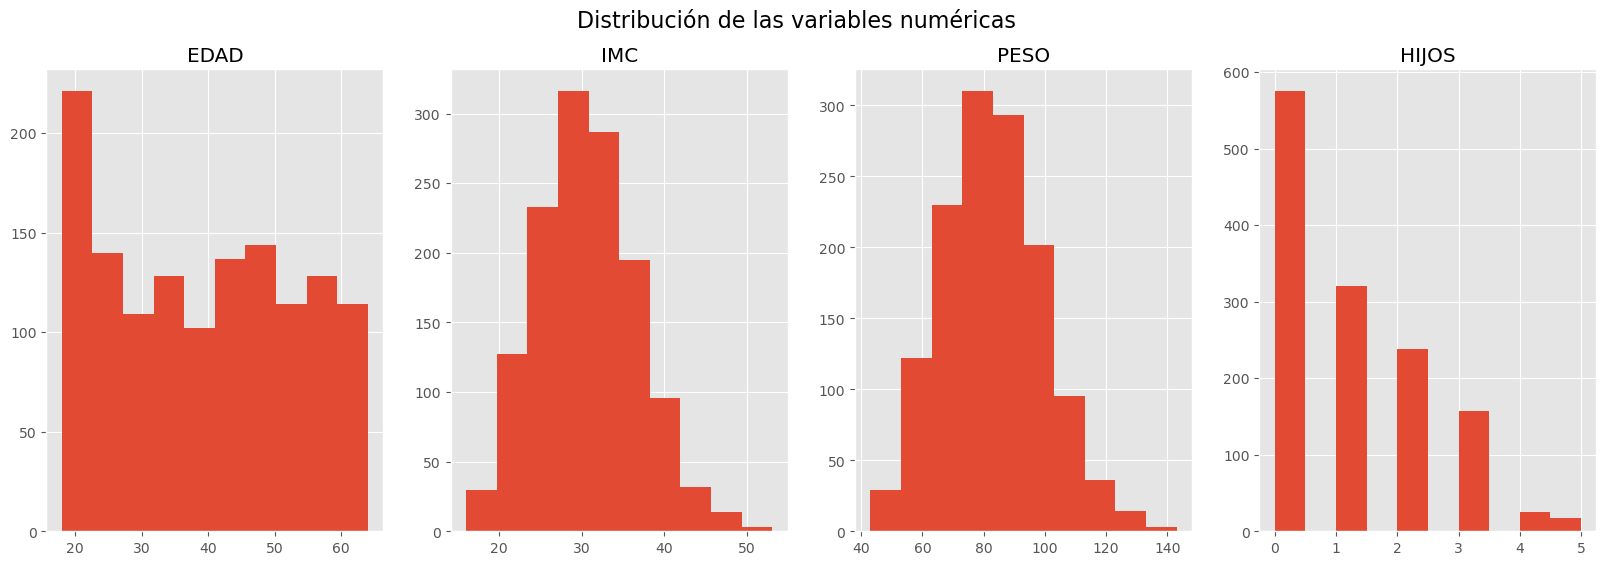

In [31]:
# instanciate the figure
fig = plt.figure(figsize = (20, 6))
for n, num in enumerate (list_num):
    fig.add_subplot(1, 4, n+1) # Indicamos número de filas y columnas
    seguros[num].hist()
    plt.title(num)

# create a title for the figure
fig.suptitle ('Distribución de las variables numéricas', fontsize = 16);

In [32]:
seguros['HIJOS'].value_counts()

0.00    575
1.00    320
2.00    238
3.00    157
4.00     25
5.00     18
Name: HIJOS, dtype: int64

*Correlación entre variables numéricas*

In [33]:
corr = seguros.corr()
corr.style.background_gradient(cmap="coolwarm")

,EDAD,IMC,PESO,HIJOS,TIENE_HIJOS,PRECIO
EDAD,1.000000,0.108806,0.110727,0.042593,0.044213,0.298308
IMC,0.108806,1.000000,0.999835,0.010973,0.014204,0.197861
PESO,0.110727,0.999835,1.000000,0.012736,0.015613,0.199698
HIJOS,0.042593,0.010973,0.012736,1.000000,0.788619,0.067988
TIENE_HIJOS,0.044213,0.014204,0.015613,0.788619,1.000000,0.061246
PRECIO,0.298308,0.197861,0.199698,0.067988,0.061246,1.000000


- Hay una correlación muy fuerte entre PESO y IMC (las dos explican lo mismo).
- Eliminamos el PESO, ya que el IMC depende de más datos del cliente, como la altura

In [34]:
del seguros ['PESO']

In [35]:
# Actualizo listas
list_num, list_bool, list_cat = obtener_lista_variables(dataset = seguros)

*Variables de baja varianza*

In [36]:
seguros = varianza_nula (dataframe = seguros)
seguros.head()

Se han borrado las siguientes variables numéricas por tener baja varianza:
 []


,EDAD,SEXO,IMC,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO
0,37,MASCULINO,29.83,2.00,1,NO,BARCELONA,534
1,25,MASCULINO,26.22,0.00,0,NO,BARCELONA,227
2,52,FEMENINO,30.78,1.00,1,NO,BARCELONA,900
3,23,MASCULINO,23.84,0.00,0,NO,BARCELONA,200
4,60,FEMENINO,36.01,0.00,0,NO,BARCELONA,1102


***Análisis de variables categóricas***

In [37]:
for i in list_cat:
  print(seguros[i].value_counts(),'\n')

MASCULINO    673
FEMENINO     660
Name: SEXO, dtype: int64 

NO    1059
SI     274
Name: FUMADOR, dtype: int64 

MADRID       364
VALENCIA     325
BARCELONA    324
SEVILLA      324
Name: CIUDAD, dtype: int64 



***Análisis de variables booleanas***

In [38]:
for i in list_bool:
  print(seguros[i].value_counts(),'\n')

1    761
0    576
Name: TIENE_HIJOS, dtype: int64 



***Análisis del target***

In [39]:
seguros['PRECIO'].value_counts(dropna = False)

136     11
142      6
717      5
178      5
135      5
        ..
3332     1
766      1
177      1
531      1
167      1
Name: PRECIO, Length: 932, dtype: int64

C:\Users\jagui\AppData\Local\Temp\ipykernel_5896\2721647497.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot (1,2,1)


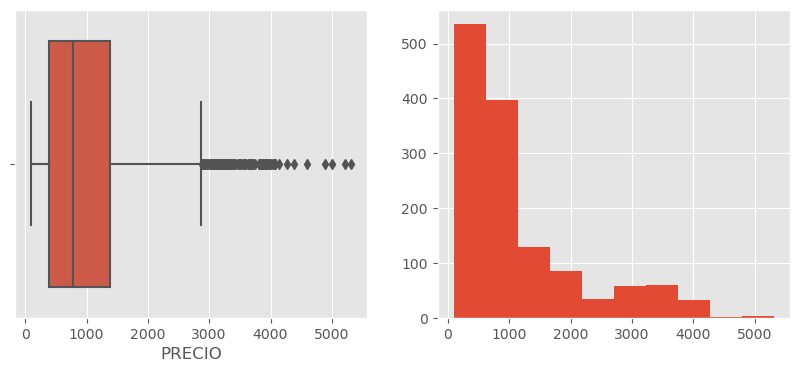

In [40]:
plot_target(dataframe = seguros, target = 'PRECIO')

El target sigue una distribución de Skewed (está sesgada hacia la izquierda) --> **se recomienda normalizarlo para que siga una distribución normal**

In [41]:
seguros['LOG_PRECIO']=np.log10(seguros['PRECIO'])

C:\Users\jagui\AppData\Local\Temp\ipykernel_5896\2721647497.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot (1,2,1)


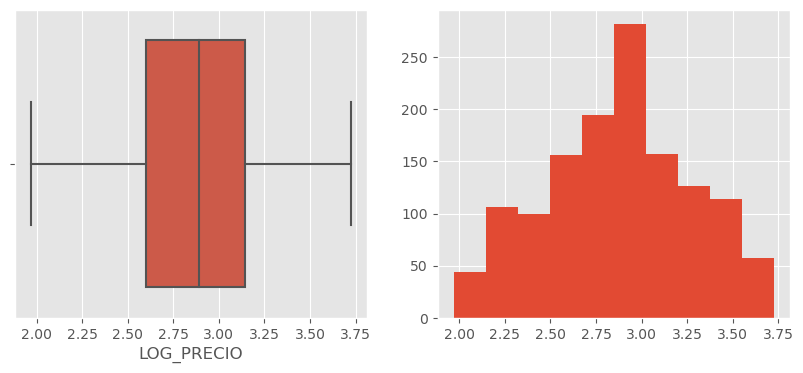

In [42]:
plot_target(dataframe = seguros, target = 'LOG_PRECIO' )

Se aprecia que ahora la distribución es más o menos normal y ya no hay outliers

### 2.2.- DISTRIBUCIÓN DE ATRIBUTOS Y CORRELACIÓN CON EL TARGET.
### *Target VS Variables independientes*

In [43]:
target = ['PRECIO', 'LOG_PRECIO']

**A.- Variables numéricas**

In [44]:
list_num

['EDAD', 'IMC', 'HIJOS']


ANÁLISIS DE EDAD CON RESPECTO AL PRECIO

        len    min     mean    max
     PRECIO PRECIO   PRECIO PRECIO
EDAD                              
18       69     93   590.52   3233
19       67    103   822.42   3310
20       29    116   846.66   3195
21       28    126   394.04   2168
22       28    139   834.46   3708
23       28    151 1,034.96   3409
24       28    164   887.39   3177
25       28    178   819.79   3509
26       28    192   511.14   3007
27       28    207 1,015.39   3301
28       28    224   755.64   4266
29       27    239   869.07   3715
30       27    296 1,059.93   3411
31       27    272   849.74   4881
32       26    322   768.35   3134
33       26    309 1,029.31   4595
34       26    328   967.81   3662
35       25    396   942.32   3332
36       25    367 1,017.04   3646
37       25    387 1,501.64   3843
38       25    449   675.20   3496
39       25    471   981.52   3342
40       27    451   981.00   3334
41       27    475   804.56   3356
42       27  

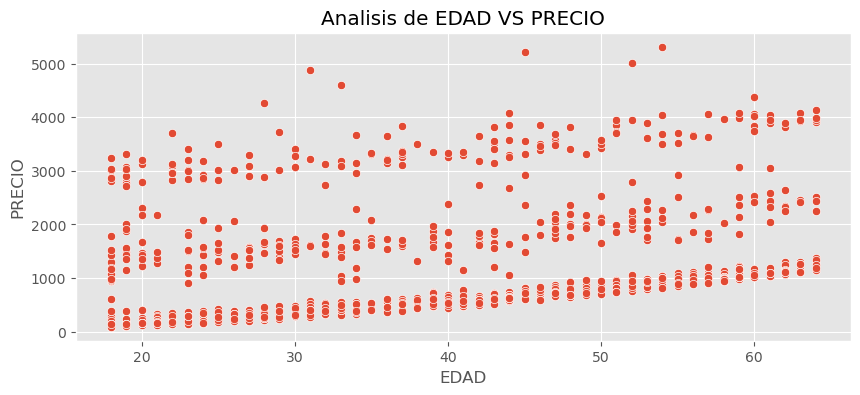


ANÁLISIS DE IMC CON RESPECTO AL PRECIO

         len    min     mean    max
      PRECIO PRECIO   PRECIO PRECIO
IMC                                
15.96      1    141   141.00    141
16.82      2    264   408.50    553
17.20      1   1205 1,205.00   1205
17.29      3    311   651.00   1069
17.39      1    231   231.00    231
...      ...    ...      ...    ...
48.07      1    786   786.00    786
49.06      1    948   948.00    948
50.38      1    203   203.00    203
52.58      1   3708 3,708.00   3708
53.13      1     97    97.00     97

[547 rows x 4 columns]


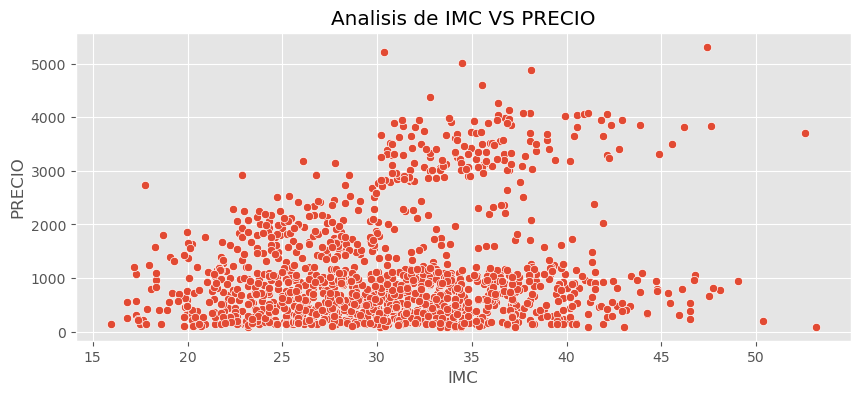


ANÁLISIS DE HIJOS CON RESPECTO AL PRECIO

         len    min     mean    max
      PRECIO PRECIO   PRECIO PRECIO
HIJOS                              
0.00     575     93 1,031.09   5314
1.00     320    143 1,058.53   4881
2.00     238    192 1,256.72   4131
3.00     157    287 1,279.59   5002
4.00      25    375 1,154.20   3349
5.00      18    391   732.22   1585


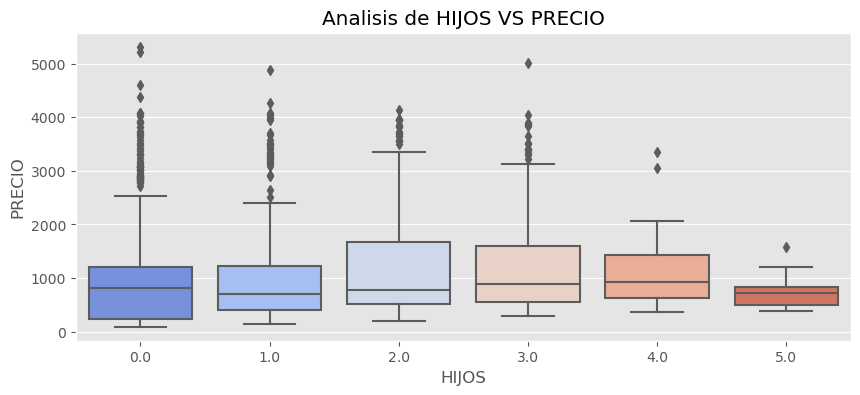

In [45]:
for var in list_num:
    print(analisis_numericas (dataframe = seguros, column = var, target = 'PRECIO'))
    plot_numericas(dataframe = seguros, column = var, target = 'PRECIO')


ANÁLISIS DE EDAD CON RESPECTO AL LOG_PRECIO

            len        min       mean        max
     LOG_PRECIO LOG_PRECIO LOG_PRECIO LOG_PRECIO
EDAD                                            
18           69       1.97       2.45       3.51
19           67       2.01       2.56       3.52
20           29       2.06       2.63       3.50
21           28       2.10       2.41       3.34
22           28       2.14       2.56       3.57
23           28       2.18       2.74       3.53
24           28       2.21       2.68       3.50
25           28       2.25       2.69       3.55
26           28       2.28       2.55       3.48
27           28       2.32       2.80       3.52
28           28       2.35       2.69       3.63
29           27       2.38       2.77       3.57
30           27       2.47       2.85       3.53
31           27       2.43       2.73       3.69
32           26       2.51       2.75       3.50
33           26       2.49       2.86       3.66
34           26       2

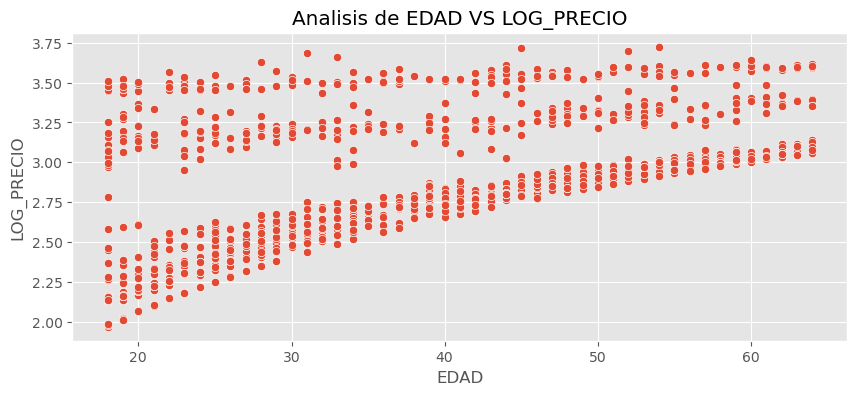


ANÁLISIS DE IMC CON RESPECTO AL LOG_PRECIO

             len        min       mean        max
      LOG_PRECIO LOG_PRECIO LOG_PRECIO LOG_PRECIO
IMC                                              
15.96          1       2.15       2.15       2.15
16.82          2       2.42       2.58       2.74
17.20          1       3.08       3.08       3.08
17.29          3       2.49       2.76       3.03
17.39          1       2.36       2.36       2.36
...          ...        ...        ...        ...
48.07          1       2.90       2.90       2.90
49.06          1       2.98       2.98       2.98
50.38          1       2.31       2.31       2.31
52.58          1       3.57       3.57       3.57
53.13          1       1.99       1.99       1.99

[547 rows x 4 columns]


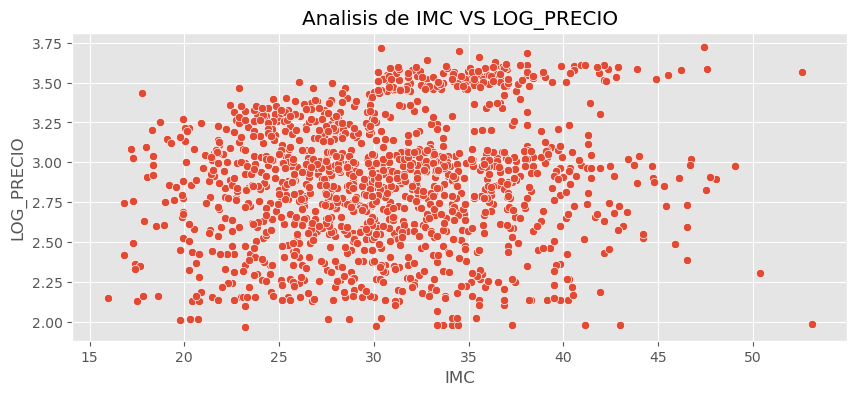


ANÁLISIS DE HIJOS CON RESPECTO AL LOG_PRECIO

             len        min       mean        max
      LOG_PRECIO LOG_PRECIO LOG_PRECIO LOG_PRECIO
HIJOS                                            
0.00         575       1.97       2.80       3.73
1.00         320       2.16       2.87       3.69
2.00         238       2.28       2.96       3.62
3.00         157       2.46       2.99       3.70
4.00          25       2.57       2.99       3.52
5.00          18       2.59       2.83       3.20


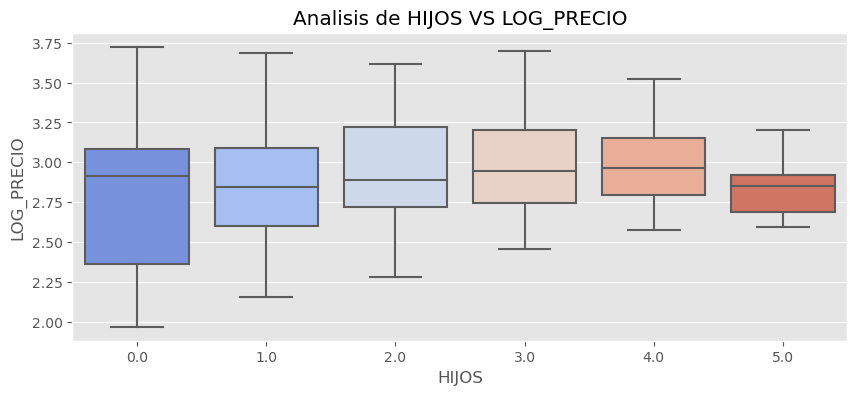

In [46]:
for var in list_num:
    print(analisis_numericas (dataframe = seguros, column = var, target = 'LOG_PRECIO'))
    plot_numericas(dataframe = seguros, column = var, target = 'LOG_PRECIO')

- La EDAD y el IMC tienen varias zonas diferencias con respecto al comportamiento del precio. Habrá que combinarlas con otras variables para ver cómo se comportan.

**B.- Variables Categóricas**

In [47]:
list_cat

['SEXO', 'FUMADOR', 'CIUDAD']

In [48]:
# SE PODRÍA HACER TAMBIÉN CON UN GROUPBY
seguros.groupby('SEXO')['PRECIO'].agg([len, sum, np.mean]).sort_values(by='SEXO',ascending=False)

,len,sum,mean
SEXO,,,
MASCULINO,673,782051,"1,162.04"
FEMENINO,660,691208,"1,047.28"



ANÁLISIS DE SEXO CON RESPECTO AL PRECIO

             len     sum     mean
          PRECIO  PRECIO   PRECIO
SEXO                             
MASCULINO    673  782051 1,162.04
FEMENINO     660  691208 1,047.28


C:\Users\jagui\AppData\Local\Temp\ipykernel_5896\711843359.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot (1,2,1)


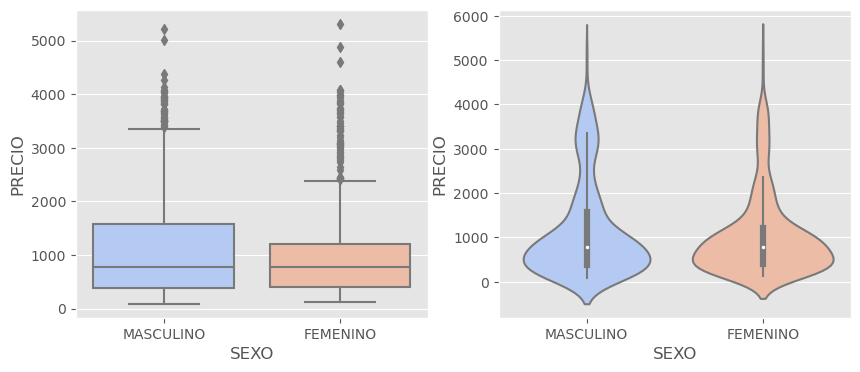


ANÁLISIS DE FUMADOR CON RESPECTO AL PRECIO



C:\Users\jagui\AppData\Local\Temp\ipykernel_5896\711843359.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot (1,2,1)


           len     sum     mean
        PRECIO  PRECIO   PRECIO
FUMADOR                        
NO        1059  744410   702.94
SI         274  731809 2,670.84


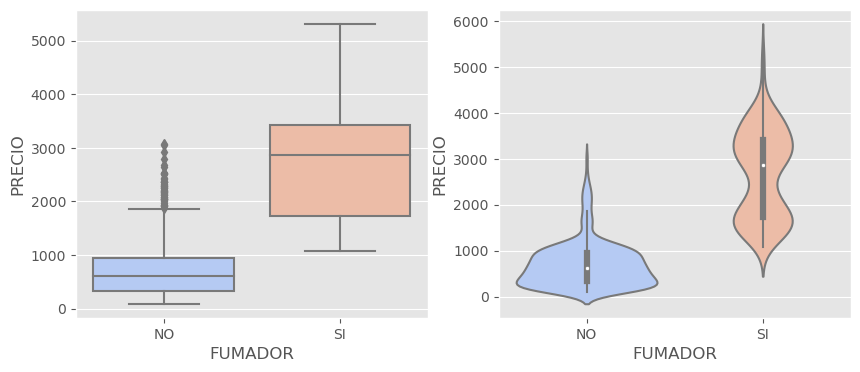


ANÁLISIS DE CIUDAD CON RESPECTO AL PRECIO

             len     sum     mean
          PRECIO  PRECIO   PRECIO
CIUDAD                           
MADRID       364  446967 1,227.93
VALENCIA     325  334392 1,028.90
BARCELONA    324  361972 1,117.20
SEVILLA      324  336165 1,037.55


C:\Users\jagui\AppData\Local\Temp\ipykernel_5896\711843359.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot (1,2,1)


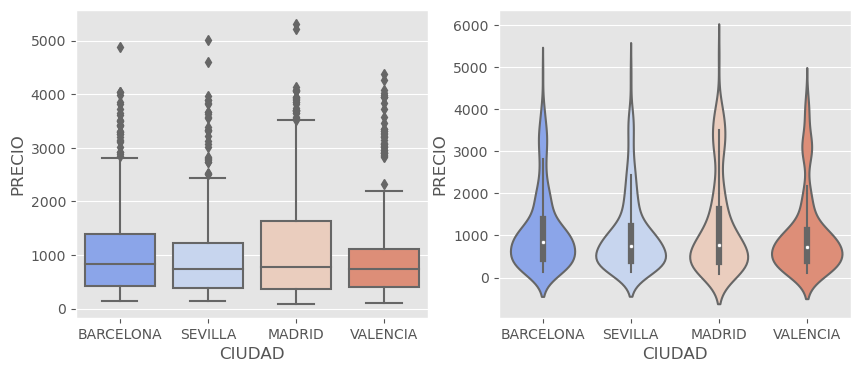

In [49]:
for var in list_cat:
    print(analisis_categoricas (dataframe = seguros, column = var, target = 'PRECIO'))
    plot_categoricas(dataframe = seguros, column = var, target = 'PRECIO')


ANÁLISIS DE SEXO CON RESPECTO AL LOG_PRECIO

                 len        sum       mean
          LOG_PRECIO LOG_PRECIO LOG_PRECIO
SEXO                                      
MASCULINO        673   1,934.79       2.87
FEMENINO         660   1,894.05       2.87


C:\Users\jagui\AppData\Local\Temp\ipykernel_5896\711843359.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot (1,2,1)


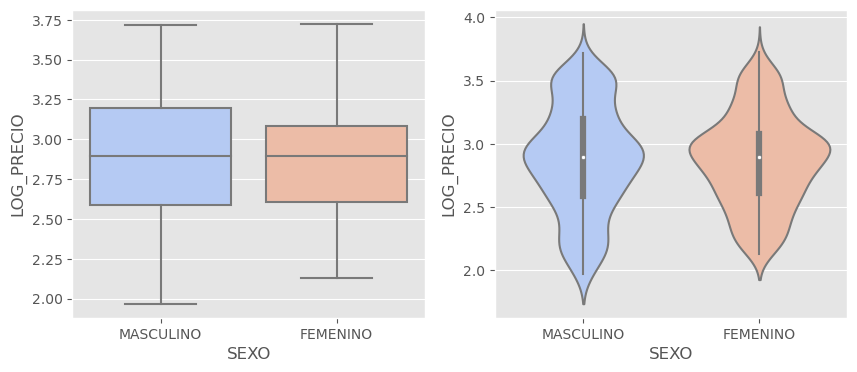


ANÁLISIS DE FUMADOR CON RESPECTO AL LOG_PRECIO

               len        sum       mean
        LOG_PRECIO LOG_PRECIO LOG_PRECIO
FUMADOR                                 
NO            1059   2,899.00       2.74
SI             274     930.46       3.40


C:\Users\jagui\AppData\Local\Temp\ipykernel_5896\711843359.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot (1,2,1)


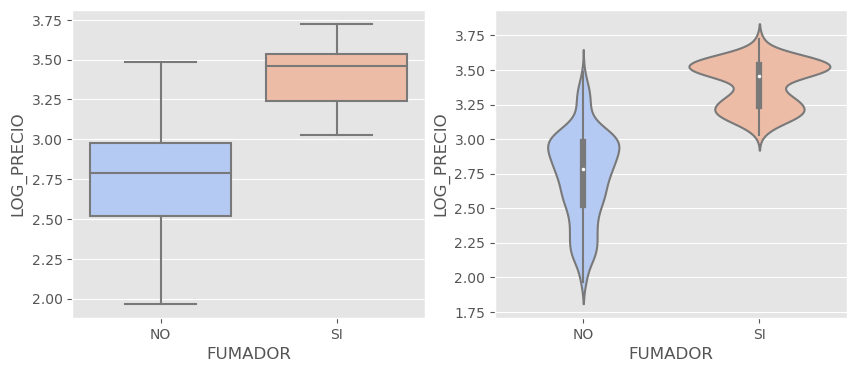


ANÁLISIS DE CIUDAD CON RESPECTO AL LOG_PRECIO

                 len        sum       mean
          LOG_PRECIO LOG_PRECIO LOG_PRECIO
CIUDAD                                    
MADRID           364   1,049.28       2.88
VALENCIA         325     923.96       2.84
BARCELONA        324     940.50       2.90
SEVILLA          324     927.27       2.86


C:\Users\jagui\AppData\Local\Temp\ipykernel_5896\711843359.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot (1,2,1)


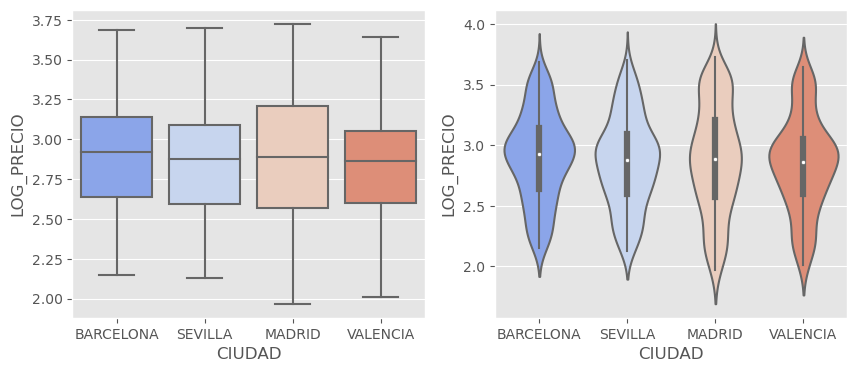

In [50]:
for var in list_cat:
    print(analisis_categoricas (dataframe = seguros, column = var, target = 'LOG_PRECIO'))
    plot_categoricas(dataframe = seguros, column = var, target = 'LOG_PRECIO')

- El SEXO  no va a ser muy relevante en la predicción del precio.
- El ser FUMADOR sí tiene mucha importancia en la predicción del precio.
- La CIUDAD no va a tener mucha influencia en el modelo.

**C.- Variables Booleanas**

In [51]:
list_bool

['TIENE_HIJOS']


ANÁLISIS DE TIENE_HIJOS CON RESPECTO AL PRECIO

               len     sum     mean
            PRECIO  PRECIO   PRECIO
TIENE_HIJOS                        
1              761  883013 1,160.33
0              576  596483 1,035.56


C:\Users\jagui\AppData\Local\Temp\ipykernel_5896\307366297.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot (1,2,1)


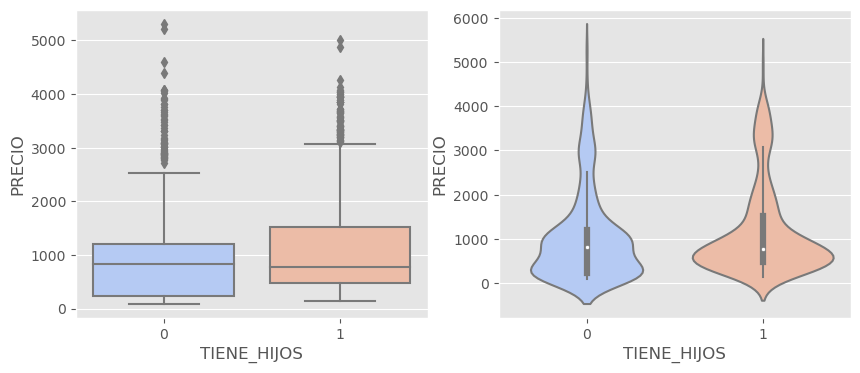

In [52]:
for var in list_bool:
    print(analisis_booleanas (dataframe = seguros, column = var, target = 'PRECIO'))
    plot_booleanas(dataframe = seguros, column = var, target = 'PRECIO')

C:\Users\jagui\AppData\Local\Temp\ipykernel_5896\307366297.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot (1,2,1)



ANÁLISIS DE TIENE_HIJOS CON RESPECTO AL LOG_PRECIO

                   len        sum       mean
            LOG_PRECIO LOG_PRECIO LOG_PRECIO
TIENE_HIJOS                                 
1                  761   2,225.61       2.92
0                  576   1,615.40       2.80


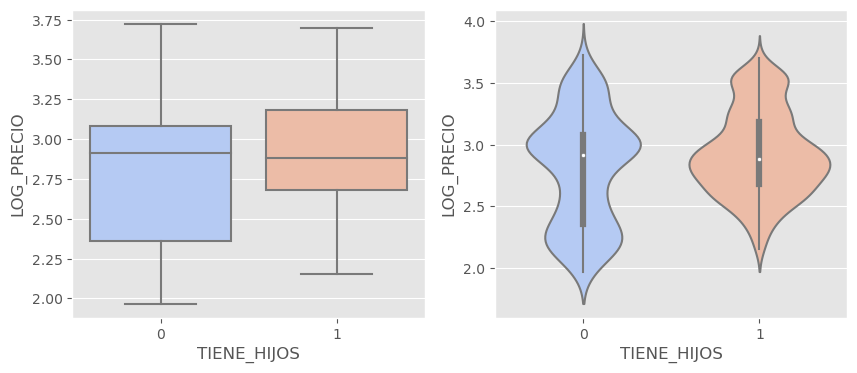

In [53]:
for var in list_bool:
    print(analisis_booleanas (dataframe = seguros, column = var, target = 'LOG_PRECIO'))
    plot_booleanas(dataframe = seguros, column = var, target = 'LOG_PRECIO')

- Esta variable no va a tener especial importancia en la predicción del precio

### *Target VS Multivariables*

**IMC y FUMADOR**

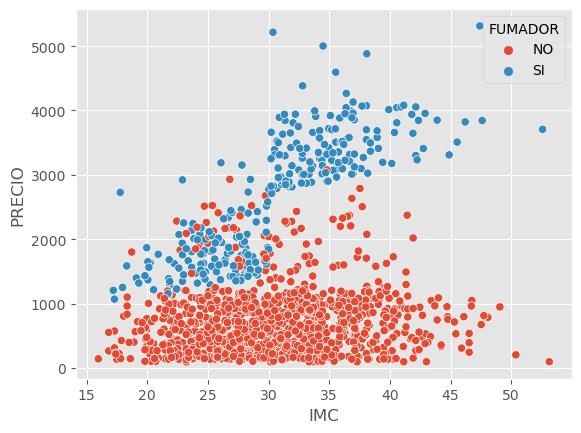

In [54]:
sns.scatterplot(x = "IMC", y = "PRECIO",hue = "FUMADOR",data = seguros);

- Se puede apreciar, que si eres fumador, el precio aumenta al aumentar el IMC --> persona de riesgo

**EDAD y FUMADOR**

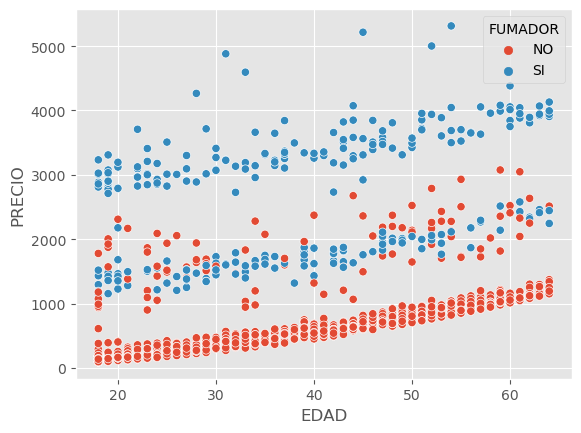

In [55]:
sns.scatterplot(x = "EDAD", y = "PRECIO",hue = "FUMADOR",data = seguros);

- El PRECIO aumenta con la edad y si eres fumador

## **3.- DATA PREPARATION**

### 3.1.- IMPUTACIÓN DE NULOS

In [56]:
nulos_variable (seguros)

Las variables numéricas que tienen nulos son:
 IMC      4
HIJOS    4
dtype: int64 

Hay un total de 2 variables numéricas con nulos


Las variables categóricas que tienen nulos son:
 SEXO       4
FUMADOR    4
dtype: int64 

Hay un total de 2 variables categóricas con nulos


VARIABLES TOTALES CON NULOS: 4


**A.- Variables numéricas**

In [57]:
seguros[seguros['IMC'].isnull()]

,EDAD,SEXO,IMC,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO,LOG_PRECIO
107,18,FEMENINO,NaN,0.00,0,NO,BARCELONA,610,2.79
162,58,FEMENINO,NaN,0.00,0,NO,BARCELONA,1036,3.02
170,21,MASCULINO,NaN,0.00,0,NO,BARCELONA,175,2.24
182,45,MASCULINO,NaN,2.00,1,NO,BARCELONA,717,2.86


No hay forma de predecir el IMC. Son pocos nulos. Se eliminan para no generar ruido al modelo

In [58]:
seguros.dropna(subset = ['IMC'], inplace = True)

In [59]:
seguros[seguros['HIJOS'].isnull()]

,EDAD,SEXO,IMC,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO,LOG_PRECIO
11,18,FEMENINO,38.66,NaN,1,NO,BARCELONA,283,2.45
53,29,MASCULINO,28.98,NaN,1,NO,BARCELONA,337,2.53
102,44,FEMENINO,20.23,NaN,1,SI,BARCELONA,1633,3.21
183,53,MASCULINO,34.10,NaN,0,SI,BARCELONA,3605,3.56


Imputo el último nulo con un 0 ya que no tiene hijos. Las tres primeras las elimino.

In [60]:
list_hijos_null = seguros[seguros['HIJOS'].isnull()].index.to_list()

In [61]:
seguros.drop(list_hijos_null[:-1], inplace = True)

In [62]:
seguros['HIJOS'].fillna(0, inplace = True)

**B.- Variables categóricas**

In [63]:
seguros[seguros['SEXO'].isnull()]

,EDAD,SEXO,IMC,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO,LOG_PRECIO
95,55,NaN,30.68,0.00,0,SI,BARCELONA,3525,3.55
116,47,NaN,33.34,0.00,0,NO,BARCELONA,1740,3.24
131,38,NaN,28.02,1.00,1,NO,BARCELONA,506,2.70
146,34,NaN,33.25,1.00,1,NO,BARCELONA,466,2.67


In [64]:
seguros['SEXO'].value_counts()

MASCULINO    670
FEMENINO     656
Name: SEXO, dtype: int64

La variable está completamente equilibrada. No es posible determinar el sexo. Eliminamos los nulos

In [65]:
seguros.dropna(subset = ['SEXO'], inplace = True)

In [66]:
seguros[seguros['FUMADOR'].isnull()]

,EDAD,SEXO,IMC,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO,LOG_PRECIO
206,59,MASCULINO,24.70,0.00,0,NaN,BARCELONA,1027,3.01
210,53,FEMENINO,23.75,2.00,1,NaN,BARCELONA,977,2.99
218,54,MASCULINO,24.04,0.00,0,NaN,BARCELONA,869,2.94
224,27,MASCULINO,32.59,3.00,1,NaN,BARCELONA,404,2.61


In [67]:
seguros['FUMADOR'].value_counts()

NO    1050
SI     272
Name: FUMADOR, dtype: int64

La mayoría son no fumadores. Imputo los nulos con un NO

In [68]:
seguros['FUMADOR'].fillna('NO', inplace = True)

In [69]:
nulos_variable (seguros)

Las variables numéricas que tienen nulos son:
 Series([], dtype: int64) 

Hay un total de 0 variables numéricas con nulos


Las variables categóricas que tienen nulos son:
 Series([], dtype: int64) 

Hay un total de 0 variables categóricas con nulos


VARIABLES TOTALES CON NULOS: 0


### 3.2.- TRATAMIENTO DE VARIABLES CATEGÓRICAS

Nuestro objetivo es predecir el precio del seguro médico.
Todas las variables que le pasemos al modelo deben ser numéricas.
Hay que transfomar las variables categóricas en numéricas.

In [70]:
target

['PRECIO', 'LOG_PRECIO']

In [71]:
seguros.head()

,EDAD,SEXO,IMC,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO,LOG_PRECIO
0,37,MASCULINO,29.83,2.00,1,NO,BARCELONA,534,2.73
1,25,MASCULINO,26.22,0.00,0,NO,BARCELONA,227,2.36
2,52,FEMENINO,30.78,1.00,1,NO,BARCELONA,900,2.95
3,23,MASCULINO,23.84,0.00,0,NO,BARCELONA,200,2.30
4,60,FEMENINO,36.01,0.00,0,NO,BARCELONA,1102,3.04


Hacemos un LabelEncoder a CIUDAD

In [72]:
# Instanciamos
le = LabelEncoder()
le

LabelEncoder()

In [73]:
seguros['CIUDAD_2'] = le.fit_transform(seguros['CIUDAD'])

In [74]:
seguros

,EDAD,SEXO,IMC,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO,LOG_PRECIO,CIUDAD_2
0,37,MASCULINO,29.83,2.00,1,NO,BARCELONA,534,2.73,0
1,25,MASCULINO,26.22,0.00,0,NO,BARCELONA,227,2.36,0
2,52,FEMENINO,30.78,1.00,1,NO,BARCELONA,900,2.95,0
3,23,MASCULINO,23.84,0.00,0,NO,BARCELONA,200,2.30,0
4,60,FEMENINO,36.01,0.00,0,NO,BARCELONA,1102,3.04,0
...,...,...,...,...,...,...,...,...,...,...
1332,19,FEMENINO,20.60,0.00,0,NO,VALENCIA,144,2.16,3
1333,52,MASCULINO,38.60,2.00,1,NO,VALENCIA,860,2.93,3
1334,23,FEMENINO,33.40,0.00,0,NO,VALENCIA,900,2.95,3
1335,52,FEMENINO,44.70,3.00,1,NO,VALENCIA,951,2.98,3


Esto solo tiene sentido si hay un ordenamiento (por ejemplo si se trata de un ranking).\
Poner una ciudad de 0 a 3 no es lo más recomendable --> aplicaremos ONE HOT ENCODING

In [75]:
del seguros['CIUDAD_2']

Estrategias a seguir:
- SEXO --> MASCULINO (0) Y FEMENINO (1)
- FUMADOR --> NO (0) Y SI (1)
- HIJOS, CIUDAD --> OHE (one hot encoding)
- ESTANDARIZAMOS --> MixMaxScaler

Convierto HIJOS a integer

In [76]:
seguros['HIJOS'] = seguros['HIJOS'].astype('Int64')

In [77]:
list_OHE = ['HIJOS', 'CIUDAD']

In [78]:
# genera las nuevas variables y elimina al mismo tiempo las antiguas
seguros = pd.get_dummies(data = seguros, prefix=None, prefix_sep="_", columns = list_OHE, drop_first = False)
seguros

,EDAD,SEXO,IMC,TIENE_HIJOS,FUMADOR,PRECIO,LOG_PRECIO,HIJOS_0,HIJOS_1,HIJOS_2,HIJOS_3,HIJOS_4,HIJOS_5,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA
0,37,MASCULINO,29.83,1,NO,534,2.73,0,0,1,0,0,0,1,0,0,0
1,25,MASCULINO,26.22,0,NO,227,2.36,1,0,0,0,0,0,1,0,0,0
2,52,FEMENINO,30.78,1,NO,900,2.95,0,1,0,0,0,0,1,0,0,0
3,23,MASCULINO,23.84,0,NO,200,2.30,1,0,0,0,0,0,1,0,0,0
4,60,FEMENINO,36.01,0,NO,1102,3.04,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,19,FEMENINO,20.60,0,NO,144,2.16,1,0,0,0,0,0,0,0,0,1
1333,52,MASCULINO,38.60,1,NO,860,2.93,0,0,1,0,0,0,0,0,0,1
1334,23,FEMENINO,33.40,0,NO,900,2.95,1,0,0,0,0,0,0,0,0,1
1335,52,FEMENINO,44.70,1,NO,951,2.98,0,0,0,1,0,0,0,0,0,1


In [79]:
seguros.replace({'MASCULINO':0, 'FEMENINO':1, 'NO':0, 'SI':1 }, inplace = True)

In [80]:
seguros.head()

,EDAD,SEXO,IMC,TIENE_HIJOS,FUMADOR,PRECIO,LOG_PRECIO,HIJOS_0,HIJOS_1,HIJOS_2,HIJOS_3,HIJOS_4,HIJOS_5,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA
0,37,0,29.83,1,0,534,2.73,0,0,1,0,0,0,1,0,0,0
1,25,0,26.22,0,0,227,2.36,1,0,0,0,0,0,1,0,0,0
2,52,1,30.78,1,0,900,2.95,0,1,0,0,0,0,1,0,0,0
3,23,0,23.84,0,0,200,2.30,1,0,0,0,0,0,1,0,0,0
4,60,1,36.01,0,0,1102,3.04,1,0,0,0,0,0,1,0,0,0


In [81]:
# Compruebo que ya no quedan variables categóricas
seguros.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1326 entries, 0 to 1336
Columns: 17 entries, EDAD to CIUDAD_VALENCIA
dtypes: float64(2), int64(5), uint8(10)
memory usage: 95.8 KB


In [82]:
seguros.reset_index (inplace = True)
del seguros['index']

In [83]:
# Vemos si hay correlación entre las variables
corr = seguros.corr()
corr.style.background_gradient(cmap="coolwarm")

,EDAD,SEXO,IMC,TIENE_HIJOS,FUMADOR,PRECIO,LOG_PRECIO,HIJOS_0,HIJOS_1,HIJOS_2,HIJOS_3,HIJOS_4,HIJOS_5,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA
EDAD,1.000000,0.020430,0.110895,0.046030,-0.029187,0.295317,0.524876,-0.046030,0.007736,0.009671,0.060716,-0.002375,-0.030323,0.004262,-0.013187,0.000757,0.008717
SEXO,0.020430,1.000000,-0.048906,-0.019844,-0.076817,-0.058038,-0.008228,0.019844,-0.011733,-0.000980,-0.003134,-0.015172,-0.011796,0.000541,-0.017165,0.013025,0.004263
IMC,0.110895,-0.048906,1.000000,0.015100,0.006288,0.199995,0.134534,-0.015100,-0.001471,0.020891,0.000774,0.016336,-0.020484,-0.138018,0.270379,-0.137420,-0.006981
TIENE_HIJOS,0.046030,-0.019844,0.015100,1.000000,0.011799,0.064814,0.152597,-1.000000,0.488459,0.405700,0.318704,0.120552,0.102018,-0.036642,-0.000870,0.030200,0.006908
FUMADOR,-0.029187,-0.076817,0.006288,0.011799,1.000000,0.787212,0.665518,-0.011799,-0.022880,0.031123,0.039279,-0.029224,-0.043453,0.003496,0.068356,-0.036777,-0.037630
PRECIO,0.295317,-0.058038,0.199995,0.064814,0.787212,1.000000,0.892918,-0.064814,-0.025214,0.070050,0.062504,0.006422,-0.043610,0.007592,0.073432,-0.039379,-0.044341
LOG_PRECIO,0.524876,-0.008228,0.134534,0.152597,0.665518,0.892918,1.000000,-0.152597,-0.004172,0.101597,0.107035,0.038987,-0.012673,0.044310,0.014668,-0.015910,-0.043068
HIJOS_0,-0.046030,0.019844,-0.015100,-1.000000,-0.011799,-0.064814,-0.152597,1.000000,-0.488459,-0.405700,-0.318704,-0.120552,-0.102018,0.036642,0.000870,-0.030200,-0.006908
HIJOS_1,0.007736,-0.011733,-0.001471,0.488459,-0.022880,-0.025214,-0.004172,-0.488459,1.000000,-0.262025,-0.205838,-0.077860,-0.065889,-0.016901,0.030499,-0.015214,0.000242
HIJOS_2,0.009671,-0.000980,0.020891,0.405700,0.031123,0.070050,0.101597,-0.405700,-0.262025,1.000000,-0.170963,-0.064668,-0.054726,-0.036820,0.004151,0.037062,-0.004980


In [84]:
minMaxResultado = MinMaxScaler()
minMaxResultado

MinMaxScaler()

In [85]:
list_scaler = ['EDAD', 'IMC']

In [86]:
for i in list_scaler:
  seguros[i] = minMaxResultado.fit_transform(seguros[i].values.reshape(-1,1)) # Reescalo el array que le doy

### 3.3. Dataset final

Ordeno las columnas y guardo el dataset final

In [87]:
seguros = seguros [
['EDAD',
 'SEXO',
 'IMC',
 'TIENE_HIJOS',
 'FUMADOR',
 'HIJOS_0',
 'HIJOS_1',
 'HIJOS_2',
 'HIJOS_3',
 'HIJOS_4',
 'HIJOS_5',
 'CIUDAD_BARCELONA',
 'CIUDAD_MADRID',
 'CIUDAD_SEVILLA',
 'CIUDAD_VALENCIA',
 'PRECIO',
 'LOG_PRECIO',]
]

In [89]:
#os.mkdir('final')
seguros.to_csv('final/seguros_final.csv')
seguros.to_pickle('final/seguros_final.pkl')

In [ ]:
pd.read_csv('final/seguros_final.csv', index_col = 0).head().T

,0,1,2,3,4
EDAD,0.41,0.15,0.74,0.11,0.91
SEXO,0.00,0.00,1.00,0.00,1.00
IMC,0.37,0.28,0.40,0.21,0.54
TIENE_HIJOS,1.00,0.00,1.00,0.00,0.00
FUMADOR,0.00,0.00,0.00,0.00,0.00
HIJOS_0,0.00,1.00,0.00,1.00,1.00
HIJOS_1,0.00,0.00,1.00,0.00,0.00
HIJOS_2,1.00,0.00,0.00,0.00,0.00
HIJOS_3,0.00,0.00,0.00,0.00,0.00
HIJOS_4,0.00,0.00,0.00,0.00,0.00
